# Appendix

In [1]:
# Imports
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn import (ensemble, datasets, 
                     metrics, model_selection, 
                     preprocessing, tree)

from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras import (callbacks, initializers, 
                              layers, losses, 
                              models, optimizers)

from sklearn.model_selection import train_test_split

# Data Merging

We will be mainly using datasets found from Our World In Data, but as we are using multiple datasets, we will have to import and merge all the datasets together.

### Import the Datasets

In [2]:
# Import CO2 data
CO2 = pd.read_csv("owid-co2-data.csv")
CO2 = CO2[['country', 'iso_code', 
           'year', 'population',
           'gdp', 'co2']].rename(columns={'country':'Entity', 
                                          'iso_code':'Code', 
                                          'year':'Year'})
CO2 = CO2.dropna().reset_index(drop=True)

# Create a column for GDP per capita
CO2['GDP Per Capita'] = CO2['gdp']/CO2['population']

In [3]:
# Import forest Data
forest_area = pd.read_csv("forest-area-km.csv")

In [4]:
# Import export data
# Column data is named: "Exports of goods and services (constant 2015 US$)"
# but we will rename to just "exports"
exports = pd.read_csv("exports-of-goods-and-services-constant-2010-us.csv")
exports = exports.rename(columns={'Exports of goods and services (constant 2015 US$)':'Exports'})

In [5]:
# Import Trade Data
trade = pd.read_csv("trade-as-share-of-gdp.csv")

In [6]:
# Import Tourism data
tourist_arrivals = pd.read_csv("international-tourist-arrivals.csv")

In [7]:
# Import economic growth data
GDP_growth = pd.read_csv("gdp-per-capita-growth.csv")

In [8]:
# Import government spending data
gov_spend = pd.read_csv("historical-gov-spending-gdp.csv")
gov_spend = gov_spend.rename(columns={'Government Expenditure (IMF based on Mauro et al. (2015))': 'Government Expenditure'})

In [9]:
# Import Diet composition data
# Units for fruit/veg consupt is kg per year per capita
fruit_consump = pd.read_csv("fruit-consumption-per-capita.csv")
fruit_consump = fruit_consump.rename(columns={'Fruit | 00002919 || Food available for consumption | 0645pc || kilograms per year per capita':'Fruit Consumption'})

veg_consump = pd.read_csv("vegetable-consumption-per-capita.csv")
veg_consump = veg_consump.rename(columns={'Vegetables | 00002918 || Food available for consumption | 0645pc || kilograms per year per capita':'Vegetable Consumption'})

In [10]:
# Import Land Use Data
# Units of Agri Land Area is thousand hectares
agri_land = pd.read_csv("agricultural-land.csv")
agri_land = agri_land.rename(columns={'Agricultural land | 00006610 || Area | 005110 || thousand hectares': 'Agricultural Land Area'})

# Units for palm oil area harvested is hectares
palm_land = pd.read_csv("land-use-palm-oil.csv")
palm_land = palm_land.rename(columns={'Palm fruit oil | 00000254 || Area harvested | 005312 || hectares':'Palm Oil Area Harvested'})


land_area = pd.read_csv("land-area-km.csv")

In [11]:
# Import urbanization data
pop_dens = pd.read_csv("population-density.csv")

In [12]:
# Import population growth data
pop_growth = pd.read_csv("population-growth-rates.csv")
pop_growth = pop_growth[['Entity', 'Code', 'Year','Growth rate - Sex: all - Age: all - Variant: estimates']].dropna()
pop_growth = pop_growth.rename(columns={'Growth rate - Sex: all - Age: all - Variant: estimates': 'Population Growth Rate Estimates'})

In [13]:
# Import food production data
# All units for food production is in tonnes
rice = pd.read_csv("rice-production.csv")
rice = rice.rename(columns={'Rice | 00000027 || Production | 005510 || tonnes': 'rice_prod'})

apple = pd.read_csv("apple-production.csv")
apple = apple.rename(columns={'Apples | 00000515 || Production | 005510 || tonnes': 'apple_prod'})

avocado = pd.read_csv("avocado-production.csv")
avocado = avocado.rename(columns={'Avocados | 00000572 || Production | 005510 || tonnes':'avocado_prod'})

banana = pd.read_csv("banana-production.csv")
banana = banana.rename(columns={'Bananas | 00000486 || Production | 005510 || tonnes': 'banana_prod'})

barley = pd.read_csv("barley-production.csv")
barley = barley.rename(columns={'Barley | 00000044 || Production | 005510 || tonnes': 'barley_prod'})

bean = pd.read_csv("bean-production.csv")
bean = bean.rename(columns={'Beans, dry | 00000176 || Production | 005510 || tonnes':'bean_prod'})

cassava = pd.read_csv("cassava-production.csv")
cassava = cassava.rename(columns={'Cassava | 00000125 || Production | 005510 || tonnes': 'cassava_prod'})

cocoa = pd.read_csv("cocoa-bean-production.csv")
cocoa = cocoa.rename(columns={'Cocoa, beans | 00000661 || Production | 005510 || tonnes':'cocoa_prod'})

coffee = pd.read_csv("coffee-bean-production.csv")
coffee = coffee.rename(columns={'Coffee, green | 00000656 || Production | 005510 || tonnes':'coffee_prod'})

In [14]:
# Import meat production data
# All units for meat production is in tonnes
pig = pd.read_csv("pigmeat-production-tonnes.csv")
pig = pig.rename(columns={'Meat, pig | 00001035 || Production | 005510 || tonnes':'pig_prod'})

chicken = pd.read_csv("chicken-meat-production.csv")
chicken = chicken.rename(columns={'Meat, chicken | 00001058 || Production | 005510 || tonnes':'chicken_prod'})

beef = pd.read_csv("beef-and-buffalo-meat-production-tonnes.csv")
beef = beef.rename(columns={'Meat, beef and buffalo | 00001806 || Production | 005510 || tonnes':'beef_prod'})

milk = pd.read_csv("milk-production-tonnes.csv")
milk = milk.rename(columns={'Milk | 00001780 || Production | 005510 || tonnes':'milk_prod'})

seafood = pd.read_csv("fish-seafood-production.csv")
seafood = seafood.rename(columns={'Fish and seafood | 00002960 || Production | 005511 || tonnes':'seafood_prod'})

aquaculture = pd.read_csv("aquaculture-farmed-fish-production.csv")

In [15]:
# Import large food category data
# Units is in tonnes

cereal = pd.read_csv("cereal-production.csv")
cereal = cereal.rename(columns={'Cereals | 00001717 || Production | 005510 || tonnes': 'cereal_prod'})
veg_prod = pd.read_csv("veg-prod.csv")
fruit_prod = pd.read_csv("fruit_prod.csv")

In [16]:
# Rename the country columns for veg_prod and fruit_prod
veg_prod = veg_prod.rename(columns={'Country':'Entity', 
                                    'Production (t)': 'Vegetable Production (t)', 
                                    'production__tonnes__per_capita': 'Veg_prod_per_cap'})
fruit_prod = fruit_prod.rename(columns={'Country':'Entity', 
                                        'Production (t)': 'Fruit Production (t)', 
                                        'production__tonnes__per_capita': 'Fruit_prod_per_cap'})

In [17]:
# Select only the data we are interested in for the two datasets
veg_prod = veg_prod[['Entity', 'Year', 'Vegetable Production (t)', 'Veg_prod_per_cap']]
fruit_prod = fruit_prod[['Entity', 'Year', 'Fruit Production (t)', 'Fruit_prod_per_cap']]

In [18]:
# We will have to merge on the country codes 
# First create a dataframe with just the country codes
c_codes = CO2[['Entity', 'Code']].drop_duplicates().reset_index(drop=True)
c_codes

,Entity,Code
0,Afghanistan,AFG
1,Albania,ALB
2,Algeria,DZA
3,Angola,AGO
4,Argentina,ARG
...,...,...
159,Venezuela,VEN
160,Vietnam,VNM
161,Yemen,YEM
162,Zambia,ZMB


In [19]:
# Merge the codes onto the dataset 
veg_prod = pd.merge(veg_prod, c_codes, on='Entity', how='left')
fruit_prod = pd.merge(fruit_prod, c_codes, on='Entity', how='left')

### Merge the Datasets

Now we will merge the datasets based on the columns Entity, Code and Year.

In [20]:
# Create a list of the datasets we want to merge
datasets = [forest_area, exports, trade,
            tourist_arrivals, GDP_growth, gov_spend, fruit_consump, 
            veg_consump, agri_land, palm_land, land_area, pop_dens, 
            pop_growth, rice, apple, avocado, banana, barley, bean, 
            cassava, cocoa, coffee, pig, chicken, beef, milk, seafood, 
            aquaculture, cereal]

In [21]:
# Create a copy of the CO2 dataframe, which will be our starting dataframe
df = CO2.copy()

In [22]:
# Now we will merge the datasets 
for i in datasets:
    df = pd.merge(df, i, on=['Entity', 'Code', 'Year'], how='left')

In [23]:
df = df.reset_index(drop=True)
df

,Entity,Code,Year,population,gdp,co2,GDP Per Capita,Forest area,Exports,Trade (% of GDP),...,cassava_prod,cocoa_prod,coffee_prod,pig_prod,chicken_prod,beef_prod,milk_prod,seafood_prod,Aquaculture production (metric tons),cereal_prod
0,Afghanistan,AFG,1950,7480464.0,9.421400e+09,0.084,1259.467336,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1951,7571542.0,9.692280e+09,0.092,1280.093250,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1952,7667534.0,1.001733e+10,0.092,1306.459816,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1953,7764549.0,1.063052e+10,0.106,1369.109759,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1954,7864289.0,1.086636e+10,0.106,1381.734613,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13440,Zimbabwe,ZWE,2014,13855758.0,2.122250e+10,11.946,1531.673864,17721000.0,2.577277e+09,54.671616,...,240000.0,NaN,850.0,20800.0,57500.0,56109.0,420000.0,24750.0,10600.0,1230995.0
13441,Zimbabwe,ZWE,2015,14154937.0,2.102745e+10,12.255,1485.520916,17674930.0,3.824969e+09,56.748810,...,242000.0,NaN,500.0,21959.0,60950.0,58501.0,423413.0,25500.0,10600.0,800286.0
13442,Zimbabwe,ZWE,2016,14452705.0,2.096179e+10,10.533,1450.371681,17628860.0,4.628243e+09,51.219025,...,243631.0,NaN,700.0,23091.0,66700.0,64805.0,426646.0,25800.0,10085.0,676748.0
13443,Zimbabwe,ZWE,2017,14751101.0,2.194784e+10,9.596,1487.877848,17582790.0,4.850708e+09,50.029713,...,246000.0,NaN,655.0,11602.0,69000.0,60138.0,415444.0,26800.0,10300.0,1748001.0


### Save the final dataset to CSV

In [24]:
# import the data as a csv file
df.to_csv(path_or_buf='data.csv',index=False)

# Data Exploration

In [25]:
# Import the dataset created from the merged datasets
df = pd.read_csv('data.csv')
df

,Entity,Code,Year,population,gdp,co2,GDP Per Capita,Forest area,Exports,Trade (% of GDP),...,cassava_prod,cocoa_prod,coffee_prod,pig_prod,chicken_prod,beef_prod,milk_prod,seafood_prod,Aquaculture production (metric tons),cereal_prod
0,Afghanistan,AFG,1950,7480464.0,9.421400e+09,0.084,1259.467336,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1951,7571542.0,9.692280e+09,0.092,1280.093250,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1952,7667534.0,1.001733e+10,0.092,1306.459816,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1953,7764549.0,1.063052e+10,0.106,1369.109759,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1954,7864289.0,1.086636e+10,0.106,1381.734613,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13440,Zimbabwe,ZWE,2014,13855758.0,2.122250e+10,11.946,1531.673864,17721000.0,2.577277e+09,54.671616,...,240000.0,NaN,850.0,20800.0,57500.0,56109.0,420000.0,24750.0,10600.0,1230995.0
13441,Zimbabwe,ZWE,2015,14154937.0,2.102745e+10,12.255,1485.520916,17674930.0,3.824969e+09,56.748810,...,242000.0,NaN,500.0,21959.0,60950.0,58501.0,423413.0,25500.0,10600.0,800286.0
13442,Zimbabwe,ZWE,2016,14452705.0,2.096179e+10,10.533,1450.371681,17628860.0,4.628243e+09,51.219025,...,243631.0,NaN,700.0,23091.0,66700.0,64805.0,426646.0,25800.0,10085.0,676748.0
13443,Zimbabwe,ZWE,2017,14751101.0,2.194784e+10,9.596,1487.877848,17582790.0,4.850708e+09,50.029713,...,246000.0,NaN,655.0,11602.0,69000.0,60138.0,415444.0,26800.0,10300.0,1748001.0


In [26]:
# Show info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13445 entries, 0 to 13444
Data columns (total 36 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Entity                                     13445 non-null  object 
 1   Code                                       13445 non-null  object 
 2   Year                                       13445 non-null  int64  
 3   population                                 13445 non-null  float64
 4   gdp                                        13445 non-null  float64
 5   co2                                        13445 non-null  float64
 6   GDP Per Capita                             13445 non-null  float64
 7   Forest area                                4568 non-null   float64
 8   Exports                                    5877 non-null   float64
 9   Trade (% of GDP)                           6961 non-null   float64
 10  International tourism,

In [27]:
df.describe()

,Year,population,gdp,co2,GDP Per Capita,Forest area,Exports,Trade (% of GDP),"International tourism, number of arrivals",GDP per capita growth (annual %),...,cassava_prod,cocoa_prod,coffee_prod,pig_prod,chicken_prod,beef_prod,milk_prod,seafood_prod,Aquaculture production (metric tons),cereal_prod
count,13445.000000,1.344500e+04,1.344500e+04,13445.000000,13445.000000,4.568000e+03,5.877000e+03,6961.000000,3.410000e+03,7433.000000,...,4.209000e+03,2.595000e+03,3.710000e+03,7.520000e+03,8.461000e+03,8.519000e+03,8.403000e+03,7.921000e+03,7.250000e+03,8.144000e+03
mean,1968.336779,3.003260e+07,2.431162e+11,113.396596,8624.997735,2.505904e+07,6.841635e+10,73.078787,9.822695e+06,2.153108,...,2.218983e+06,5.952190e+04,9.396742e+04,5.116314e+05,2.977902e+05,3.268007e+05,3.329198e+06,6.941386e+05,2.646934e+05,1.240862e+07
std,39.761567,1.040318e+08,9.740353e+11,503.552267,11478.044747,8.555002e+07,1.763480e+11,50.653098,2.460840e+07,6.197660,...,5.738947e+06,1.807255e+05,2.714286e+05,2.919513e+06,1.235621e+06,1.111666e+06,1.012848e+07,2.923124e+06,2.639142e+06,4.558929e+07
min,1820.000000,2.431000e+04,5.543200e+07,0.000000,363.270287,0.000000e+00,3.078091e+07,0.020999,7.000000e+02,-64.992371,...,0.000000e+00,7.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,2.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00
25%,1953.000000,2.906608e+06,9.508433e+09,1.474000,1966.694344,5.504700e+05,2.407964e+09,41.541431,4.972500e+05,-0.031233,...,2.600000e+04,8.000000e+02,1.905000e+03,2.967500e+03,6.380000e+03,1.231000e+04,5.463000e+04,1.020000e+04,7.200000e+01,3.133612e+05
50%,1977.000000,6.886463e+06,3.002472e+10,8.262000,4459.583743,3.334425e+06,1.006529e+10,60.847881,1.831000e+06,2.291699,...,2.535080e+05,3.700000e+03,1.300000e+04,2.141600e+04,3.199000e+04,5.280000e+04,3.881300e+05,7.028000e+04,1.876500e+03,1.447505e+06
75%,1998.000000,2.167870e+07,1.269087e+11,48.406000,10110.978308,1.513329e+07,4.960616e+10,90.504402,6.528750e+06,4.610066,...,1.300000e+06,2.093750e+04,7.210900e+04,1.937912e+05,1.427120e+05,1.910935e+05,2.092718e+06,4.089500e+05,2.192825e+04,6.402206e+06
max,2018.000000,1.417069e+09,1.815162e+13,10353.877000,166150.492457,8.151591e+08,2.437377e+12,442.620026,2.119980e+08,140.367020,...,5.956592e+07,2.113189e+06,3.552729e+06,5.671390e+07,1.956804e+07,1.233455e+07,1.879767e+08,6.219715e+07,6.613506e+07,6.181653e+08


In [28]:
# Create a groupby to find the average CO2 emissions and the number of records (years)
# Note that CO2 emissions are recorded in millions of tonnes
by_country = pd.DataFrame(df.groupby('Entity')
                          ['co2'].agg(['mean', 'count']).reset_index())
by_country = by_country.sort_values(by=['mean', 'count'], ascending=False)
by_country

,Entity,mean,count
29,China,2649.836605,81
156,United States,2044.801221,199
124,Russia,1695.974186,59
56,Germany,535.488759,170
75,Japan,466.721051,136
...,...,...,...
26,Central African Republic,0.169150,60
61,Guinea-Bissau,0.137580,69
31,Comoros,0.078950,60
42,Dominica,0.066456,68


From this, we can see that the China had the largest average CO2 emissions at 2649 million tonnes. The count column shows that China has recorded CO2 emissions for 81 years.

### Create Plot of CO2 by Country

In [29]:
# Determine the countries that produce the most co2 in 2018
most_emit = df[df['Year'] == 2018].sort_values(by='co2', ascending=False)
most_emit.head()

,Entity,Code,Year,population,gdp,co2,GDP Per Capita,Forest area,Exports,Trade (% of GDP),...,cassava_prod,cocoa_prod,coffee_prod,pig_prod,chicken_prod,beef_prod,milk_prod,seafood_prod,Aquaculture production (metric tons),cereal_prod
2544,China,CHN,2018,1.417069e+09,1.815162e+13,10353.877,12809.266577,216104608.0,NaN,37.565784,...,4887277.0,NaN,115500.0,54037357.0,14424957.0,6440600.0,35044349.0,62197148.0,6.613506e+07,608917809.0
12932,United States,USA,2018,3.321400e+08,1.814065e+13,5376.657,54617.462728,309915000.0,2.437377e+12,27.475481,...,NaN,NaN,2490.0,11942965.0,19568042.0,12219203.0,98713160.0,5475780.0,4.681850e+05,439711070.0
5730,India,IND,2018,1.369003e+09,8.835758e+12,2600.447,6454.153718,71627200.0,5.140253e+11,43.598656,...,4950000.0,20000.0,316000.0,375723.0,4061790.0,2570342.0,187976694.0,11607680.0,7.071302e+06,321556400.0
10182,Russia,RUS,2018,1.456523e+08,3.613410e+12,1700.453,24808.470291,815159144.0,4.475610e+11,51.580925,...,NaN,NaN,NaN,3744170.0,4543002.0,1608136.0,30605996.0,5054340.0,2.040320e+05,109838123.0
6522,Japan,JPN,2018,1.262559e+08,4.867011e+12,1143.412,38548.786014,24938600.0,8.712962e+11,36.638927,...,NaN,NaN,NaN,1284213.0,2249585.0,475336.0,7291927.0,3819400.0,1.032675e+06,11575317.0


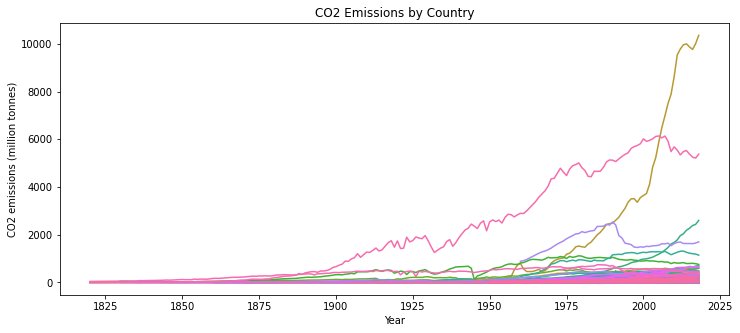

In [30]:
# Plot CO2 Emissions over time
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(data=df, x='Year', y='co2', hue='Entity', legend=False)
ax = ax.set(title='CO2 Emissions by Country', ylabel='CO2 emissions (million tonnes)');

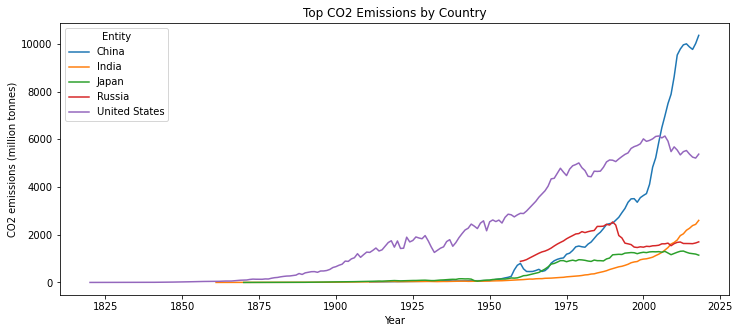

In [34]:
# Plot the top 5 Countries with the highest average CO2 emissions
m_cty = list(most_emit['Entity'].values)
m_cty = m_cty[:5]

m_cty_df = df[(df.isin(m_cty)==True).any(axis=1)]

# Plot CO2 Emissions over time
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(data=m_cty_df, x='Year', y='co2', hue='Entity', legend=True)
ax = ax.set(title='Top CO2 Emissions by Country', ylabel='CO2 emissions (million tonnes)');

### Plot Global CO2 Emissions

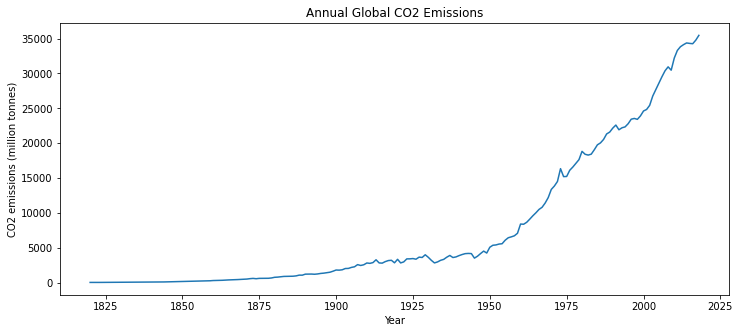

In [35]:
# Plot co2 emissions globally
fig, ax = plt.subplots(figsize=(12,5))
total_emissions = pd.DataFrame(df.groupby('Year')['co2'].sum()).reset_index()
ax = sns.lineplot(data=total_emissions, x='Year', y='co2')
ax = ax.set(title='Annual Global CO2 Emissions', ylabel='CO2 emissions (million tonnes)');

### Correlation Matrix

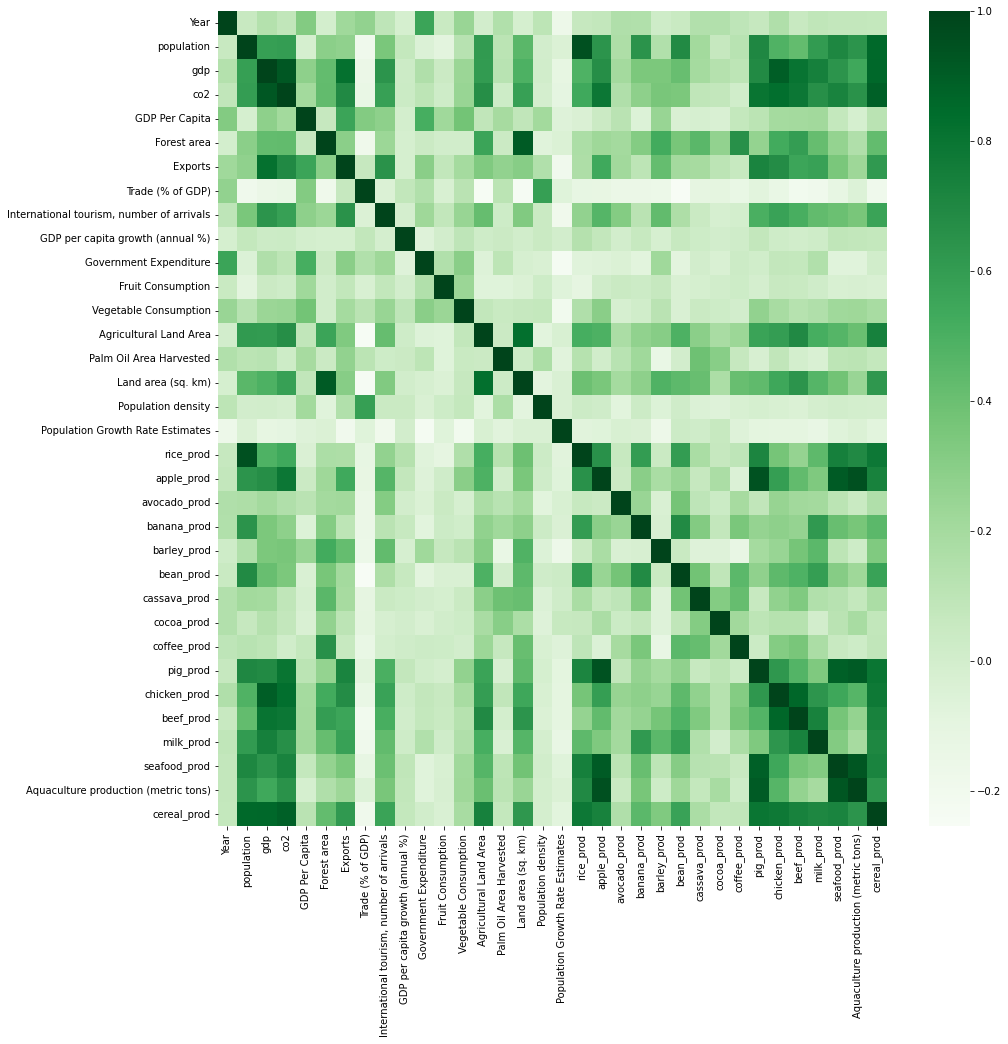

In [36]:
# Determine the correlation between the features
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(df.corr(numeric_only=True), cmap='Greens', xticklabels=True, yticklabels=True);

# Exploring Null Data

Now we will explore our null data to find a suitable portion of the data to use for our RNN models. We will use the original data from "data.csv", which was stored as df.

In [37]:
# using the dataframe before the RF model
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13445 entries, 0 to 13444
Data columns (total 36 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Entity                                     13445 non-null  object 
 1   Code                                       13445 non-null  object 
 2   Year                                       13445 non-null  int64  
 3   population                                 13445 non-null  float64
 4   gdp                                        13445 non-null  float64
 5   co2                                        13445 non-null  float64
 6   GDP Per Capita                             13445 non-null  float64
 7   Forest area                                4568 non-null   float64
 8   Exports                                    5877 non-null   float64
 9   Trade (% of GDP)                           6961 non-null   float64
 10  International tourism,

In [38]:
# First fill in the production values with 0 again
prod_cols = df.columns[20:]
for col in prod_cols:
    df[col] = df[col].fillna(0)

### Count Nulls by Variable

In [39]:
# Create a function to count the number of null values for each variable
def count_nulls(df):
    nulls = pd.DataFrame(df.isnull().sum())
    nulls = nulls[nulls[0]!= 0]
    nulls = nulls.reset_index().rename(columns={'index':'variable', 
                                                0:'Num_nulls'})
    nulls = nulls.sort_values(by='Num_nulls', ascending=False)
    return nulls

In [40]:
nulls = count_nulls(df)
nulls

,variable,Num_nulls
9,Palm Oil Area Harvested,11254
3,"International tourism, number of arrivals",10035
0,Forest area,8877
1,Exports,7568
5,Government Expenditure,6933
2,Trade (% of GDP),6484
4,GDP per capita growth (annual %),6012
6,Fruit Consumption,5505
7,Vegetable Consumption,5505
8,Agricultural Land Area,4922


In [41]:
half_data = df.shape[0]/2
half_data

6722.5

From the table above, we can see that the first five variables have more than half the records recorded as null values. Therefore, we will exclude these variables from our dataframe.

In [42]:
# Create a list of variables we want to exlude
exclude_vars = list(nulls['variable'].values)
exclude_vars = exclude_vars[:5]

# create a new df exluding these variables
new_df = df.drop(columns=exclude_vars)

#### Find the null values again in the new dataframe

In [43]:
nulls = count_nulls(new_df)
nulls

,variable,Num_nulls
0,Trade (% of GDP),6484
1,GDP per capita growth (annual %),6012
2,Fruit Consumption,5505
3,Vegetable Consumption,5505
4,Agricultural Land Area,4922
5,Land area (sq. km),4451
7,Population Growth Rate Estimates,2927
6,Population density,109


In [44]:
# save the null columns 
null_cols = list(nulls['variable'].values)

In [45]:
# Create a function to find nulls by a variable
def grouped_nulls(data, group: str):
    
    # Find the nulls in the dataframe
    variable = data[group].reset_index()
    rest = new_df.drop(columns=group)
    rest = rest.isnull().reset_index()
    
    # Combine the two dataframes
    nulls = variable.merge(rest, on='index', how='left').drop(columns='index')
    
    # Create a groupby the selected group
    gpby = nulls.groupby(group).sum().astype('int64')
    
    # Select only columns where null values were found
    gpby = gpby[null_cols]
    
    # Create a list of the variables
    new_cols = list(gpby.columns)[1:]
    
    # Start the total nulls with the first variable
    gpby['total_nulls']= gpby['Trade (% of GDP)']

    # Use a for loop to add the other null values
    for col in new_cols:
        gpby['total_nulls'] = gpby['total_nulls'] + gpby[col]
    
    # Sort the nulls by total_nulls
    gpby = gpby.sort_values(by='total_nulls', ascending=False)
    gpby
    
    return gpby

In [46]:
# Show the total null values grouped by country
by_country = grouped_nulls(new_df, 'Entity')
by_country[:10]

,Trade (% of GDP),GDP per capita growth (annual %),Fruit Consumption,Vegetable Consumption,Agricultural Land Area,Land area (sq. km),Population Growth Rate Estimates,Population density,total_nulls
Entity,,,,,,,,,
United States,150,141,141,141,141,141,130,0,985
United Kingdom,150,141,141,141,141,141,130,0,985
Australia,140,141,141,141,141,141,130,0,975
France,140,141,141,141,141,141,130,0,975
Belgium,124,115,154,154,154,115,104,0,920
Norway,137,128,128,128,128,128,117,0,894
Sweden,122,123,123,123,123,123,112,0,849
Denmark,123,118,118,118,118,118,107,0,820
Netherlands,123,115,115,115,115,115,104,0,802


From the code above, we found the total null values grouped by country then sorted by ascending number of total null values. After that, we returned the top 10 countries with the most null values. From this table, we can see that the country with the most null values is the US, followed by UK and Australia. Since the top countries with null values may be too important to drop from our analysis, we will not be dropping any countries. 

In [47]:
# Show the total nulls grouped by Year
by_year = grouped_nulls(new_df, 'Year')
top_by_year = by_year[:40]
top_by_year = top_by_year.reset_index().sort_values(by='Year', ascending=False)
top_by_year.head()

,Year,Trade (% of GDP),GDP per capita growth (annual %),Fruit Consumption,Vegetable Consumption,Agricultural Land Area,Land area (sq. km),Population Growth Rate Estimates,Population density,total_nulls
2,1960,83,141,141,141,141,141,0,1,789
0,1959,140,140,140,140,140,140,0,1,841
1,1958,133,133,133,133,133,133,0,1,799
3,1957,129,129,129,129,129,129,0,1,775
4,1956,129,129,129,129,129,129,0,1,775


The code above find the total_nulls by each year, the sorts them in ascending order by the total_null values. We then selected the top 40 years, then sorted the values by the year to find the most recent year that is in the top 40 years with the most null values.

We will try selecting only data from years 1960 and onwards, then find the number of null values again.

In [48]:
after_1960 = new_df[new_df['Year'] > 1960]
after_1960

,Entity,Code,Year,population,gdp,co2,GDP Per Capita,Trade (% of GDP),GDP per capita growth (annual %),Fruit Consumption,...,cassava_prod,cocoa_prod,coffee_prod,pig_prod,chicken_prod,beef_prod,milk_prod,seafood_prod,Aquaculture production (metric tons),cereal_prod
11,Afghanistan,AFG,1961,8790140.0,1.314629e+10,0.491,1495.571982,12.550610,NaN,40.163784,...,0.0,0.0,0.0,0.0,5600.0,43000.0,574900.0,300.0,0.0,3695000.0
12,Afghanistan,AFG,1962,8969055.0,1.336763e+10,0.689,1490.417209,14.227644,NaN,37.148922,...,0.0,0.0,0.0,0.0,6000.0,45800.0,576700.0,300.0,0.0,3696000.0
13,Afghanistan,AFG,1963,9157463.0,1.363030e+10,0.707,1488.436056,26.035511,NaN,37.435555,...,0.0,0.0,0.0,0.0,6160.0,47250.0,646700.0,300.0,0.0,3378000.0
14,Afghanistan,AFG,1964,9355510.0,1.387050e+10,0.839,1482.602652,26.944448,NaN,46.947453,...,0.0,0.0,0.0,0.0,6400.0,48000.0,659900.0,300.0,0.0,3732000.0
15,Afghanistan,AFG,1965,9565154.0,1.418742e+10,1.007,1483.240066,32.671082,NaN,47.754383,...,0.0,0.0,0.0,0.0,6800.0,48700.0,720900.0,300.0,0.0,3785000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13440,Zimbabwe,ZWE,2014,13855758.0,2.122250e+10,11.946,1531.673864,54.671616,0.596149,17.060364,...,240000.0,0.0,850.0,20800.0,57500.0,56109.0,420000.0,24750.0,10600.0,1230995.0
13441,Zimbabwe,ZWE,2015,14154937.0,2.102745e+10,12.255,1485.520916,56.748810,0.100575,21.930569,...,242000.0,0.0,500.0,21959.0,60950.0,58501.0,423413.0,25500.0,10600.0,800286.0
13442,Zimbabwe,ZWE,2016,14452705.0,2.096179e+10,10.533,1450.371681,51.219025,-0.793105,21.419483,...,243631.0,0.0,700.0,23091.0,66700.0,64805.0,426646.0,25800.0,10085.0,676748.0
13443,Zimbabwe,ZWE,2017,14751101.0,2.194784e+10,9.596,1487.877848,50.029713,3.192453,21.480604,...,246000.0,0.0,655.0,11602.0,69000.0,60138.0,415444.0,26800.0,10300.0,1748001.0


In [49]:
# Determine the number of nulls in the new dataframe
nulls = count_nulls(after_1960)
nulls

,variable,Num_nulls
0,Trade (% of GDP),2188
1,GDP per capita growth (annual %),1658
2,Fruit Consumption,1151
3,Vegetable Consumption,1151
4,Agricultural Land Area,568
5,Land area (sq. km),97
6,Population density,58


In [50]:
# Determine the number of nulls by country
by_country = grouped_nulls(after_1960, 'Entity')
by_country[:10]

,Trade (% of GDP),GDP per capita growth (annual %),Fruit Consumption,Vegetable Consumption,Agricultural Land Area,Land area (sq. km),Population Growth Rate Estimates,Population density,total_nulls
Entity,,,,,,,,,
Taiwan,58,58,0,0,0,58,0,58,232
Montenegro,39,37,45,45,45,0,0,0,211
Serbia,34,35,45,45,45,0,0,0,204
Qatar,33,40,58,58,0,0,0,0,189
Equatorial Guinea,44,20,58,58,0,0,0,0,180
Ethiopia,50,21,32,32,32,0,0,0,167
Libya,29,39,49,49,0,0,0,0,166
Luxembourg,9,0,39,39,39,39,0,0,165
Croatia,34,35,31,31,31,0,0,0,162


In [51]:
# Determine the number of nulls by year
by_year = grouped_nulls(after_1960, 'Year')
top_by_year = by_year[:10]
top_by_year = top_by_year.reset_index().sort_values(by='Year', ascending=False)
top_by_year.head()

,Year,Trade (% of GDP),GDP per capita growth (annual %),Fruit Consumption,Vegetable Consumption,Agricultural Land Area,Land area (sq. km),Population Growth Rate Estimates,Population density,total_nulls
8,1986,51,40,37,37,26,2,0,1,194
3,1985,53,41,37,37,26,2,0,1,197
7,1984,52,42,36,36,25,2,0,1,194
6,1983,53,42,36,36,25,2,0,1,195
4,1982,53,43,36,36,25,2,0,1,196


## Groupby Country to Number of Records for each Country

After selecting our final dataset, we can count how many records there are for each country.

In [52]:
# Rename the dataframe we will be using:
n_df = after_1960.copy()

In [53]:
# Create a groupby country to count the number of records for each country
gpby_country = pd.DataFrame(n_df.groupby(['Entity'])
                            ['Year'].count()).sort_values(by='Year', 
                                                          ascending=True)
gpby_country

,Year
Entity,
Palestine,29
Lesotho,29
Namibia,29
North Korea,29
Slovakia,34
...,...
Guatemala,58
Guinea,58
Guinea-Bissau,58


In [54]:
n_df = n_df.reset_index().drop(columns='index')

In [55]:
# Show the final dataframe
n_df

,Entity,Code,Year,population,gdp,co2,GDP Per Capita,Trade (% of GDP),GDP per capita growth (annual %),Fruit Consumption,...,cassava_prod,cocoa_prod,coffee_prod,pig_prod,chicken_prod,beef_prod,milk_prod,seafood_prod,Aquaculture production (metric tons),cereal_prod
0,Afghanistan,AFG,1961,8790140.0,1.314629e+10,0.491,1495.571982,12.550610,NaN,40.163784,...,0.0,0.0,0.0,0.0,5600.0,43000.0,574900.0,300.0,0.0,3695000.0
1,Afghanistan,AFG,1962,8969055.0,1.336763e+10,0.689,1490.417209,14.227644,NaN,37.148922,...,0.0,0.0,0.0,0.0,6000.0,45800.0,576700.0,300.0,0.0,3696000.0
2,Afghanistan,AFG,1963,9157463.0,1.363030e+10,0.707,1488.436056,26.035511,NaN,37.435555,...,0.0,0.0,0.0,0.0,6160.0,47250.0,646700.0,300.0,0.0,3378000.0
3,Afghanistan,AFG,1964,9355510.0,1.387050e+10,0.839,1482.602652,26.944448,NaN,46.947453,...,0.0,0.0,0.0,0.0,6400.0,48000.0,659900.0,300.0,0.0,3732000.0
4,Afghanistan,AFG,1965,9565154.0,1.418742e+10,1.007,1483.240066,32.671082,NaN,47.754383,...,0.0,0.0,0.0,0.0,6800.0,48700.0,720900.0,300.0,0.0,3785000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9086,Zimbabwe,ZWE,2014,13855758.0,2.122250e+10,11.946,1531.673864,54.671616,0.596149,17.060364,...,240000.0,0.0,850.0,20800.0,57500.0,56109.0,420000.0,24750.0,10600.0,1230995.0
9087,Zimbabwe,ZWE,2015,14154937.0,2.102745e+10,12.255,1485.520916,56.748810,0.100575,21.930569,...,242000.0,0.0,500.0,21959.0,60950.0,58501.0,423413.0,25500.0,10600.0,800286.0
9088,Zimbabwe,ZWE,2016,14452705.0,2.096179e+10,10.533,1450.371681,51.219025,-0.793105,21.419483,...,243631.0,0.0,700.0,23091.0,66700.0,64805.0,426646.0,25800.0,10085.0,676748.0
9089,Zimbabwe,ZWE,2017,14751101.0,2.194784e+10,9.596,1487.877848,50.029713,3.192453,21.480604,...,246000.0,0.0,655.0,11602.0,69000.0,60138.0,415444.0,26800.0,10300.0,1748001.0


# Data Cleaning

We will now clean our data in preparation for our models.

### Split Data by Country

To split the data, we will take 75% of the records for each country to use as the training data, and 25% of the records for each country to use for the test data.

In [56]:
# Create a list of the unique countries we will use
countries = list(n_df['Entity'].unique())

We will use a for four loop to go through these countries and perform the train test split then append these records to the final train test sample dataframes:

In [57]:
# Create lists to store the final train and testing sets
X_train = pd.DataFrame()
X_test = pd.DataFrame()
y_train = pd.DataFrame()
y_test = pd.DataFrame()

# Use a for loop to apply the train test split for each country and append
for country in countries:
    
    # Select the records
    records = n_df[n_df['Entity']== country]
    x_records = records.drop(columns=['Code', 'co2'])
    y_records = records[['Year', 'co2']]
    
    # Perform the split 
    xtrain, xtest, ytrain, ytest = train_test_split(x_records, 
                                                    y_records, 
                                                    train_size=0.75, 
                                                    shuffle=False, 
                                                    random_state=1)
    
    # Append the data to the final train test dataframes
    X_train = pd.concat([X_train, xtrain])
    X_test = pd.concat([X_test, xtest])
    y_train = pd.concat([y_train, ytrain])
    y_test = pd.concat([y_test, ytest])

In [58]:
# Show the train set
X_train

,Entity,Year,population,gdp,GDP Per Capita,Trade (% of GDP),GDP per capita growth (annual %),Fruit Consumption,Vegetable Consumption,Agricultural Land Area,...,cassava_prod,cocoa_prod,coffee_prod,pig_prod,chicken_prod,beef_prod,milk_prod,seafood_prod,Aquaculture production (metric tons),cereal_prod
0,Afghanistan,1961,8790140.0,1.314629e+10,1495.571982,12.550610,NaN,40.163784,35.886677,37700000.0,...,0.0,0.0,0.0,0.0,5600.0,43000.0,574900.0,300.0,0.0,3695000.0
1,Afghanistan,1962,8969055.0,1.336763e+10,1490.417209,14.227644,NaN,37.148922,36.630795,37760000.0,...,0.0,0.0,0.0,0.0,6000.0,45800.0,576700.0,300.0,0.0,3696000.0
2,Afghanistan,1963,9157463.0,1.363030e+10,1488.436056,26.035511,NaN,37.435555,38.042355,37810000.0,...,0.0,0.0,0.0,0.0,6160.0,47250.0,646700.0,300.0,0.0,3378000.0
3,Afghanistan,1964,9355510.0,1.387050e+10,1482.602652,26.944448,NaN,46.947453,39.354740,37873000.0,...,0.0,0.0,0.0,0.0,6400.0,48000.0,659900.0,300.0,0.0,3732000.0
4,Afghanistan,1965,9565154.0,1.418742e+10,1483.240066,32.671082,NaN,47.754383,40.045422,37875000.0,...,0.0,0.0,0.0,0.0,6800.0,48700.0,720900.0,300.0,0.0,3785000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9071,Zimbabwe,1999,11716452.0,2.784127e+10,2376.253977,70.922661,-1.452399,10.507017,10.580347,14840000.0,...,170000.0,0.0,10000.0,12770.0,23575.0,95380.0,469800.0,13610.0,1203.0,1986269.0
9072,Zimbabwe,2000,11834679.0,2.676498e+10,2261.571959,74.067413,-3.538612,11.218519,10.629180,15060000.0,...,175000.0,0.0,9100.0,21835.0,25300.0,101250.0,478800.0,15270.0,2151.0,1961931.0
9073,Zimbabwe,2001,11910981.0,2.678117e+10,2248.443656,67.897873,1.078704,12.825666,12.202857,15240000.0,...,176397.0,0.0,7518.0,29150.0,37950.0,98741.0,497000.0,14590.0,2285.0,1851459.0
9074,Zimbabwe,2002,11984643.0,2.487246e+10,2075.360796,66.807350,-9.125608,13.609309,11.282931,15470000.0,...,178773.0,0.0,8050.0,29260.0,35075.0,88341.0,405600.0,13710.0,2263.0,855208.0


In [59]:
# Print the shape of the traing and test sets
print("X Train Shape: ", X_train.shape, "\n")
print("X Test Shape: ", X_test.shape, "\n")
print("y Train Shape: ", y_train.shape, "\n")
print("y Test Shape: ", y_test.shape, "\n")

X Train Shape:  (6744, 29) 

X Test Shape:  (2347, 29) 

y Train Shape:  (6744, 2) 

y Test Shape:  (2347, 2) 



### Drop Entity Column

To standardize the data, we first need to drop the entity column as the function cannot take string values. We will save the entity values then add them back to the dataframe after we standardize the data.

In [60]:
# Save the entity column 
train_entities = X_train['Entity'].values
test_entities = X_test['Entity'].values

In [61]:
# Drop the entity column
X_train = X_train.drop(columns='Entity')
X_test = X_test.drop(columns='Entity')

In [62]:
# Save the column names so we can append them back on to the dataframe
col_names = list(X_train.columns)

# Standardize the Data

In [63]:
# Standardisation
scaler  = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [64]:
# Show the X_train and add back the headers
X_train = pd.DataFrame(X_train)
X_train.columns = col_names
X_train.head()

,Year,population,gdp,GDP Per Capita,Trade (% of GDP),GDP per capita growth (annual %),Fruit Consumption,Vegetable Consumption,Agricultural Land Area,Land area (sq. km),...,cassava_prod,cocoa_prod,coffee_prod,pig_prod,chicken_prod,beef_prod,milk_prod,seafood_prod,Aquaculture production (metric tons),cereal_prod
0,0.000000,0.006789,0.000954,0.017196,0.030492,NaN,0.086848,0.079739,0.071855,0.039814,...,0.0,0.0,0.0,0.0,0.000371,0.003486,0.006618,0.000008,0.0,0.008099
1,0.020408,0.006928,0.000970,0.017118,0.034573,NaN,0.080329,0.081520,0.071970,0.039814,...,0.0,0.0,0.0,0.0,0.000398,0.003713,0.006639,0.000008,0.0,0.008101
2,0.040816,0.007074,0.000989,0.017088,0.063309,NaN,0.080949,0.084899,0.072065,0.039814,...,0.0,0.0,0.0,0.0,0.000408,0.003831,0.007444,0.000008,0.0,0.007404
3,0.061224,0.007228,0.001007,0.016999,0.065521,NaN,0.101516,0.088041,0.072185,0.039814,...,0.0,0.0,0.0,0.0,0.000424,0.003892,0.007596,0.000008,0.0,0.008180
4,0.081633,0.007390,0.001030,0.017009,0.079457,NaN,0.103261,0.089694,0.072189,0.039814,...,0.0,0.0,0.0,0.0,0.000451,0.003948,0.008299,0.000008,0.0,0.008296


In [65]:
# Add back the headers for the test_set
X_test = pd.DataFrame(X_test)
X_test.columns = col_names
X_test.head()

,Year,population,gdp,GDP Per Capita,Trade (% of GDP),GDP per capita growth (annual %),Fruit Consumption,Vegetable Consumption,Agricultural Land Area,Land area (sq. km),...,cassava_prod,cocoa_prod,coffee_prod,pig_prod,chicken_prod,beef_prod,milk_prod,seafood_prod,Aquaculture production (metric tons),cereal_prod
0,0.877551,0.018244,0.001624,0.008865,NaN,0.302480,0.045391,0.055083,0.072258,0.039814,...,0.0,0.0,0.0,0.0,0.002042,0.012104,0.020632,0.000037,0.000013,0.007803
1,0.897959,0.018909,0.001848,0.010269,NaN,0.351580,0.045681,0.079712,0.072256,0.039814,...,0.0,0.0,0.0,0.0,0.002143,0.011439,0.020003,0.000037,0.000013,0.011890
2,0.918367,0.019710,0.002089,0.011605,NaN,0.327454,0.046631,0.080390,0.072256,0.039814,...,0.0,0.0,0.0,0.0,0.001618,0.009510,0.018887,0.000037,0.000013,0.010166
3,0.938776,0.020067,0.002512,0.014709,NaN,0.370157,0.042552,0.077714,0.072256,0.039814,...,0.0,0.0,0.0,0.0,0.001167,0.011107,0.020214,0.000052,0.000030,0.012682
4,0.959184,0.020474,0.002662,0.015490,NaN,0.324244,0.039134,0.071679,0.072256,0.039814,...,0.0,0.0,0.0,0.0,0.001379,0.010783,0.019652,0.000052,0.000030,0.008658


# Fill NAs

In [66]:
# Now we will fill the rest of the null values with the average of the column
X_train = X_train.fillna(X_train.mean())

In [67]:
# Fill NAs in test set
X_test = X_test.fillna(X_test.mean())

In [68]:
# Check to see if there are any remaining null values in the train
count_nulls(X_train)

,variable,Num_nulls


In [69]:
# Check to see if there are any remaining null values in the test
count_nulls(X_test)

,variable,Num_nulls


# RF Model

In [88]:
X_train_rf = X_train.drop(columns=['Year'])
X_test_rf = X_test.drop(columns=['Year'])

In [72]:
y_train_rf = y_train.drop(columns=['Year'])
y_test_rf = y_test.drop(columns=['Year'])

In [89]:
# Fitting Random Forest model
rf_model = ensemble.RandomForestRegressor(n_estimators = 25,
                                          max_depth = 10,
                                          bootstrap=True, 
                                          oob_score=True, 
                                          random_state = 1)
rf_model.fit(X_train_rf, y_train_rf.values.ravel())

RandomForestRegressor(max_depth=10, n_estimators=25, oob_score=True,
                      random_state=1)

In [90]:
# Training and test accuracy
print(f'Training accuracy: {rf_model.score(X_train_rf, y_train_rf):0.2f}')
print(f'Test accuracy:     {rf_model.score(X_test_rf, y_test_rf):0.2f}')

Training accuracy: 1.00
Test accuracy:     0.76


We want to optimise the tuning parameters n_estimators, max_depth, and max_features of the model using grid-search 5-fold cross-validation to see if we can improve our prediction accuracy.

In [91]:
param_grid = {
    'n_estimators': [25, 30, 35, 40],
    'max_depth': [5, 10, 12, 15],
    'max_features': ["sqrt", "log2", None]
}

In [92]:
rf_gridsearch = model_selection.GridSearchCV(estimator = rf_model, param_grid = param_grid, cv=5)

rf_gridsearch.fit(X_train_rf, y_train_rf.values.ravel())

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(max_depth=10, n_estimators=25,
                                             oob_score=True, random_state=1),
             param_grid={'max_depth': [5, 10, 12, 15],
                         'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [25, 30, 35, 40]})

In [93]:
# Show best set of parameters
rf_gridsearch.best_params_

{'max_depth': 15, 'max_features': 'log2', 'n_estimators': 40}

In [94]:
# Show the best score
rf_gridsearch.best_score_

0.6692575588933123

In [95]:
# Fitting Random Forest model
rf_model2 = ensemble.RandomForestRegressor(n_estimators = 40,
                                          max_depth = 15,
                                          max_features = "log2",
                                          bootstrap=True, 
                                          oob_score=True, 
                                          random_state = 1)
rf_model2.fit(X_train_rf, y_train_rf.values.ravel())

RandomForestRegressor(max_depth=15, max_features='log2', n_estimators=40,
                      oob_score=True, random_state=1)

In [96]:
# New training and test accuracy
print(f'Training accuracy: {rf_model2.score(X_train_rf, y_train_rf):0.2f}')
print(f'Test accuracy:     {rf_model2.score(X_test_rf, y_test_rf):0.2f}')

Training accuracy: 1.00
Test accuracy:     0.81


In [97]:
# Store feature importances into a pd.Series
k = X_train_rf.columns
feature_imp = pd.Series(rf_model2.feature_importances_, 
                        index=k).sort_values(ascending=False)

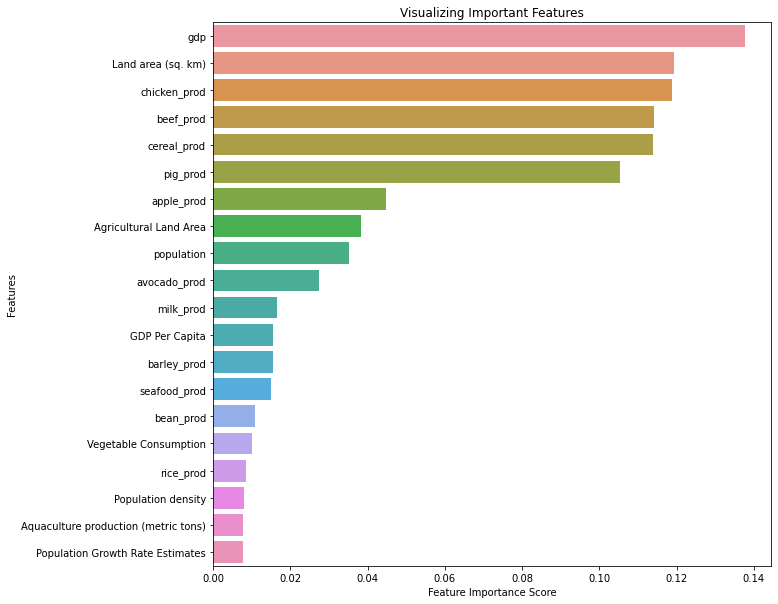

In [98]:
# Creating a bar plot
plt.figure(figsize=(10,10))
sns.barplot(x=feature_imp[:20], y=feature_imp.index[:20])

# Adding labels
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visualizing Important Features")
plt.show();

# Generate Lags for our Variables

### Add back the Entity and Target Columns

We will now add back the entity column and target variable columns so that we can lag all of our data.

In [99]:
# Add back the entity column for the train and test set
X_train['Entity'] = train_entities
X_test['Entity'] = test_entities

In [100]:
X_train

,Year,population,gdp,GDP Per Capita,Trade (% of GDP),GDP per capita growth (annual %),Fruit Consumption,Vegetable Consumption,Agricultural Land Area,Land area (sq. km),...,cocoa_prod,coffee_prod,pig_prod,chicken_prod,beef_prod,milk_prod,seafood_prod,Aquaculture production (metric tons),cereal_prod,Entity
0,0.000000,0.006789,0.000954,0.017196,0.030492,0.326636,0.086848,0.079739,0.071855,0.039814,...,0.0,0.000000,0.000000,0.000371,0.003486,0.006618,0.000008,0.000000,0.008099,Afghanistan
1,0.020408,0.006928,0.000970,0.017118,0.034573,0.326636,0.080329,0.081520,0.071970,0.039814,...,0.0,0.000000,0.000000,0.000398,0.003713,0.006639,0.000008,0.000000,0.008101,Afghanistan
2,0.040816,0.007074,0.000989,0.017088,0.063309,0.326636,0.080949,0.084899,0.072065,0.039814,...,0.0,0.000000,0.000000,0.000408,0.003831,0.007444,0.000008,0.000000,0.007404,Afghanistan
3,0.061224,0.007228,0.001007,0.016999,0.065521,0.326636,0.101516,0.088041,0.072185,0.039814,...,0.0,0.000000,0.000000,0.000424,0.003892,0.007596,0.000008,0.000000,0.008180,Afghanistan
4,0.081633,0.007390,0.001030,0.017009,0.079457,0.326636,0.103261,0.089694,0.072189,0.039814,...,0.0,0.000000,0.000000,0.000451,0.003948,0.008299,0.000008,0.000000,0.008296,Afghanistan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6739,0.775510,0.009060,0.002026,0.030600,0.172545,0.309409,0.022720,0.019163,0.028284,0.023584,...,0.0,0.003831,0.000301,0.001563,0.007733,0.005408,0.000345,0.000034,0.004353,Zimbabwe
6740,0.795918,0.009151,0.001947,0.028855,0.180199,0.299250,0.024258,0.019280,0.028703,0.023584,...,0.0,0.003486,0.000515,0.001677,0.008209,0.005512,0.000387,0.000062,0.004300,Zimbabwe
6741,0.816327,0.009211,0.001948,0.028655,0.165184,0.321734,0.027733,0.023047,0.029046,0.023584,...,0.0,0.002880,0.000688,0.002516,0.008005,0.005721,0.000370,0.000065,0.004058,Zimbabwe
6742,0.836735,0.009268,0.001809,0.026021,0.162531,0.272044,0.029428,0.020845,0.029485,0.023584,...,0.0,0.003084,0.000690,0.002326,0.007162,0.004669,0.000348,0.000065,0.001874,Zimbabwe


In [101]:
# Create the co2 column
co2_train = y_train[['co2']].reset_index().drop(columns='index').reset_index()
co2_test = y_test[['co2']].reset_index().drop(columns='index').reset_index()

In [102]:
X_train = X_train.reset_index()
X_test = X_test.reset_index()

We will also add back the co2 column to the feature dataframes as we want to also lag our target values.

In [103]:
# Merge the co2 data with the features
total_train = pd.merge(co2_train, 
                       X_train, 
                       how='left', 
                       on='index').drop(columns='index')
total_test = pd.merge(co2_test, 
                      X_test, 
                      how='left', 
                      on='index').drop(columns='index')

In [104]:
# Show the resulting dataframe
total_train

,co2,Year,population,gdp,GDP Per Capita,Trade (% of GDP),GDP per capita growth (annual %),Fruit Consumption,Vegetable Consumption,Agricultural Land Area,...,cocoa_prod,coffee_prod,pig_prod,chicken_prod,beef_prod,milk_prod,seafood_prod,Aquaculture production (metric tons),cereal_prod,Entity
0,0.491,0.000000,0.006789,0.000954,0.017196,0.030492,0.326636,0.086848,0.079739,0.071855,...,0.0,0.000000,0.000000,0.000371,0.003486,0.006618,0.000008,0.000000,0.008099,Afghanistan
1,0.689,0.020408,0.006928,0.000970,0.017118,0.034573,0.326636,0.080329,0.081520,0.071970,...,0.0,0.000000,0.000000,0.000398,0.003713,0.006639,0.000008,0.000000,0.008101,Afghanistan
2,0.707,0.040816,0.007074,0.000989,0.017088,0.063309,0.326636,0.080949,0.084899,0.072065,...,0.0,0.000000,0.000000,0.000408,0.003831,0.007444,0.000008,0.000000,0.007404,Afghanistan
3,0.839,0.061224,0.007228,0.001007,0.016999,0.065521,0.326636,0.101516,0.088041,0.072185,...,0.0,0.000000,0.000000,0.000424,0.003892,0.007596,0.000008,0.000000,0.008180,Afghanistan
4,1.007,0.081633,0.007390,0.001030,0.017009,0.079457,0.326636,0.103261,0.089694,0.072189,...,0.0,0.000000,0.000000,0.000451,0.003948,0.008299,0.000008,0.000000,0.008296,Afghanistan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6739,15.728,0.775510,0.009060,0.002026,0.030600,0.172545,0.309409,0.022720,0.019163,0.028284,...,0.0,0.003831,0.000301,0.001563,0.007733,0.005408,0.000345,0.000034,0.004353,Zimbabwe
6740,13.818,0.795918,0.009151,0.001947,0.028855,0.180199,0.299250,0.024258,0.019280,0.028703,...,0.0,0.003486,0.000515,0.001677,0.008209,0.005512,0.000387,0.000062,0.004300,Zimbabwe
6741,12.509,0.816327,0.009211,0.001948,0.028655,0.165184,0.321734,0.027733,0.023047,0.029046,...,0.0,0.002880,0.000688,0.002516,0.008005,0.005721,0.000370,0.000065,0.004058,Zimbabwe
6742,11.896,0.836735,0.009268,0.001809,0.026021,0.162531,0.272044,0.029428,0.020845,0.029485,...,0.0,0.003084,0.000690,0.002326,0.007162,0.004669,0.000348,0.000065,0.001874,Zimbabwe


In [105]:
# Create a copy of our train and test sets
train = total_train.copy()
test = total_test.copy()

### Lag the Training Data

In [106]:
# We will first group the data by entity and year
gpby_entity = train.groupby('Entity')

In [107]:
# Create a list of the countries
countries = list(train['Entity'].unique())

In [108]:
# Create a function to lag the data by i timestep:
def shift(grouped_df, num_shift):
    
    # Create a list to store the shifted dataframes
    shifted = []
    
    # Shift the data by country using a for loop
    for country in countries:
        country_data = grouped_df.get_group(country)

        shifted_df = country_data.shift(num_shift)
        # shifted_df = shifted_df.dropna()
        shifted.append(shifted_df)
        
    # Save a list of the current column names
    current = list(grouped_df.obj.columns)
    
    # Create a list to append the new column names
    new_cols = []
    
    # Create the new column labels
    if num_shift > 0:
        for label in current:
            n_label = label + (" (t-%d)" % num_shift)
            new_cols.append(n_label)
    elif num_shift == 0:
        for label in current:
            n_label = label + " (t)"
            new_cols.append(n_label)
    else:
        for label in current:
            n_label = label + (" (t+%d)" % -num_shift)
            new_cols.append(n_label)
        
    # Create a dataframe with the new shifted data
    all_shifted = pd.concat(shifted)
    
    # Replace the column headers
    all_shifted = all_shifted.set_axis(new_cols, axis=1).reset_index()
    
    # Remove the NA
    all_shifted = all_shifted.dropna()
      
    return all_shifted

In [109]:
# Create the data from time t-1
tminus_one = shift(gpby_entity, 1)

In [110]:
# Create the data for time t
timet = shift(gpby_entity, 0)

In [111]:
# Merge the data together into a single dataframe
lagged_train = pd.merge(tminus_one, 
                        timet, 
                        how='left',
                        on='index').drop(columns='index')
lagged_train

,co2 (t-1),Year (t-1),population (t-1),gdp (t-1),GDP Per Capita (t-1),Trade (% of GDP) (t-1),GDP per capita growth (annual %) (t-1),Fruit Consumption (t-1),Vegetable Consumption (t-1),Agricultural Land Area (t-1),...,cocoa_prod (t),coffee_prod (t),pig_prod (t),chicken_prod (t),beef_prod (t),milk_prod (t),seafood_prod (t),Aquaculture production (metric tons) (t),cereal_prod (t),Entity (t)
0,0.491,0.000000,0.006789,0.000954,0.017196,0.030492,0.326636,0.086848,0.079739,0.071855,...,0.0,0.000000,0.000000,0.000398,0.003713,0.006639,0.000008,0.000000,0.008101,Afghanistan
1,0.689,0.020408,0.006928,0.000970,0.017118,0.034573,0.326636,0.080329,0.081520,0.071970,...,0.0,0.000000,0.000000,0.000408,0.003831,0.007444,0.000008,0.000000,0.007404,Afghanistan
2,0.707,0.040816,0.007074,0.000989,0.017088,0.063309,0.326636,0.080949,0.084899,0.072065,...,0.0,0.000000,0.000000,0.000424,0.003892,0.007596,0.000008,0.000000,0.008180,Afghanistan
3,0.839,0.061224,0.007228,0.001007,0.016999,0.065521,0.326636,0.101516,0.088041,0.072185,...,0.0,0.000000,0.000000,0.000451,0.003948,0.008299,0.000008,0.000000,0.008296,Afghanistan
4,1.007,0.081633,0.007390,0.001030,0.017009,0.079457,0.326636,0.103261,0.089694,0.072189,...,0.0,0.000000,0.000000,0.000477,0.005513,0.008639,0.000008,0.000000,0.007647,Afghanistan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6575,14.131,0.755102,0.008929,0.002036,0.031315,0.215356,0.326529,0.022197,0.019431,0.027674,...,0.0,0.003831,0.000301,0.001563,0.007733,0.005408,0.000345,0.000034,0.004353,Zimbabwe
6576,15.728,0.775510,0.009060,0.002026,0.030600,0.172545,0.309409,0.022720,0.019163,0.028284,...,0.0,0.003486,0.000515,0.001677,0.008209,0.005512,0.000387,0.000062,0.004300,Zimbabwe
6577,13.818,0.795918,0.009151,0.001947,0.028855,0.180199,0.299250,0.024258,0.019280,0.028703,...,0.0,0.002880,0.000688,0.002516,0.008005,0.005721,0.000370,0.000065,0.004058,Zimbabwe
6578,12.509,0.816327,0.009211,0.001948,0.028655,0.165184,0.321734,0.027733,0.023047,0.029046,...,0.0,0.003084,0.000690,0.002326,0.007162,0.004669,0.000348,0.000065,0.001874,Zimbabwe


### Lag the Test Data

In [112]:
# We will first group the test data by entity and year
gpby_entityt = test.groupby('Entity')

In [113]:
# Create the test data from time t-1
ttminus_one = shift(gpby_entityt, 1)

In [114]:
# Create the test data from time t-1
timett = shift(gpby_entityt, 0)

In [115]:
# Merge the data together into a single dataframe
lagged_test = pd.merge(ttminus_one, 
                       timett, 
                       how='left', 
                       on='index').drop(columns='index')
lagged_test

,co2 (t-1),Year (t-1),population (t-1),gdp (t-1),GDP Per Capita (t-1),Trade (% of GDP) (t-1),GDP per capita growth (annual %) (t-1),Fruit Consumption (t-1),Vegetable Consumption (t-1),Agricultural Land Area (t-1),...,cocoa_prod (t),coffee_prod (t),pig_prod (t),chicken_prod (t),beef_prod (t),milk_prod (t),seafood_prod (t),Aquaculture production (metric tons) (t),cereal_prod (t),Entity (t)
0,1.237,0.877551,0.018244,0.001624,0.008865,0.213704,0.302480,0.045391,0.055083,0.072258,...,0.0,0.000000,0.000000,0.002143,0.011439,0.020003,0.000037,0.000013,0.011890,Afghanistan
1,1.890,0.897959,0.018909,0.001848,0.010269,0.213704,0.351580,0.045681,0.079712,0.072256,...,0.0,0.000000,0.000000,0.001618,0.009510,0.018887,0.000037,0.000013,0.010166,Afghanistan
2,2.159,0.918367,0.019710,0.002089,0.011605,0.213704,0.327454,0.046631,0.080390,0.072256,...,0.0,0.000000,0.000000,0.001167,0.011107,0.020214,0.000052,0.000030,0.012682,Afghanistan
3,2.800,0.938776,0.020067,0.002512,0.014709,0.213704,0.370157,0.042552,0.077714,0.072256,...,0.0,0.000000,0.000000,0.001379,0.010783,0.019652,0.000052,0.000030,0.008658,Afghanistan
4,4.254,0.959184,0.020474,0.002662,0.015490,0.213704,0.324244,0.039134,0.071679,0.072256,...,0.0,0.000000,0.000000,0.001326,0.010945,0.019938,0.000052,0.000047,0.014277,Afghanistan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2178,11.671,1.061224,0.010486,0.001536,0.018151,0.142695,0.317418,0.031569,0.033045,0.030876,...,0.0,0.000326,0.000491,0.003812,0.004549,0.004835,0.000628,0.000304,0.002698,Zimbabwe
2179,11.946,1.081633,0.010719,0.001543,0.017746,0.132997,0.319384,0.036890,0.032520,0.030876,...,0.0,0.000192,0.000518,0.004041,0.004743,0.004874,0.000647,0.000304,0.001754,Zimbabwe
2180,12.255,1.102041,0.010952,0.001529,0.017043,0.138052,0.316971,0.047421,0.032041,0.030876,...,0.0,0.000268,0.000545,0.004422,0.005254,0.004911,0.000654,0.000289,0.001483,Zimbabwe
2181,10.533,1.122449,0.011183,0.001524,0.016508,0.124595,0.312619,0.046316,0.031441,0.030876,...,0.0,0.000251,0.000274,0.004575,0.004876,0.004782,0.000680,0.000295,0.003831,Zimbabwe


# Reshape the Data

#### Drop the Entity Column

In [116]:
# Drop the entity and year columns from the training and testing sets
lagged_train = lagged_train.drop(columns=['Entity (t-1)', 'Entity (t)', 'Year (t-1)', 'Year (t)'])
lagged_test = lagged_test.drop(columns=['Entity (t-1)', 'Entity (t)', 'Year (t-1)', 'Year (t)'])

In [117]:
# Split into X features and y target dataframes
y_train = lagged_train[['co2 (t)']]
X_train = lagged_train.drop(columns='co2 (t)')

y_test = lagged_test[['co2 (t)']]
X_test = lagged_test.drop(columns='co2 (t)')

In [118]:
# Print the shape of the training and test sets
print("X Train Shape: ", X_train.shape, "\n")
print("X Test Shape: ", X_test.shape, "\n")
print("y Train Shape: ", y_train.shape, "\n")
print("y Test Shape: ", y_test.shape, "\n")

X Train Shape:  (6580, 55) 

X Test Shape:  (2183, 55) 

y Train Shape:  (6580, 1) 

y Test Shape:  (2183, 1) 



In [119]:
# Store the values of the input data
X_train_v = X_train.values
X_test_v = X_test.values

In [120]:
# Store the values of the target data
y_train = y_train.values
y_test = y_test.values

In [121]:
# Reshape the input data into a 3D in the format of 
# [samples, timesteps, features]
X_train = X_train_v.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test_v.reshape((X_test.shape[0], 1, X_test.shape[1]))

print("X Train Shape: ", X_train.shape, "\n")
print("X Test Shape: ", X_test.shape, "\n")

X Train Shape:  (6580, 1, 55) 

X Test Shape:  (2183, 1, 55) 



# RNN Implementation

# Simple RNN Model

In [1]:
# Create a simpleRNN model
def build_RNN():
  inputs  = layers.Input(shape=(X_train.shape[1], 
                                X_train.shape[2]), name='input_layer')
  hidden  = layers.SimpleRNN(128, activation='relu', name='hidden1')(inputs)

  outputs = layers.Dense(units=1, name='output_layer')(hidden)
  model   = models.Model(inputs=inputs, outputs=outputs, 
                         name=("SimpleRNN"))
  return model

In [159]:
# Create an RNN with a single LSTM layer 
simpleRNN = build_RNN()

# Model Summary
simpleRNN.summary()

Model: "SimpleRNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 1, 55)]           0         
                                                                 
 hidden1 (SimpleRNN)         (None, 128)               23552     
                                                                 
 output_layer (Dense)        (None, 1)                 129       
                                                                 
Total params: 23,681
Trainable params: 23,681
Non-trainable params: 0
_________________________________________________________________


In [160]:
# Compiling model
simpleRNN.compile(
    loss=losses.MeanAbsoluteError(),
    optimizer=optimizers.Adam(learning_rate=0.001), 
    metrics=['MeanAbsoluteError'])

In [161]:
# Fit the model 
training = simpleRNN.fit(X_train, 
                         y_train, 
                         epochs=50, 
                         batch_size=64, 
                         validation_split=0.2, 
                         verbose=2, shuffle=False)

Epoch 1/50
83/83 - 2s - loss: 72.8591 - mean_absolute_error: 72.8591 - val_loss: 141.8822 - val_mean_absolute_error: 141.8822 - 2s/epoch - 18ms/step
Epoch 2/50
83/83 - 0s - loss: 30.9833 - mean_absolute_error: 30.9833 - val_loss: 19.5521 - val_mean_absolute_error: 19.5521 - 219ms/epoch - 3ms/step
Epoch 3/50
83/83 - 0s - loss: 4.4549 - mean_absolute_error: 4.4549 - val_loss: 7.1373 - val_mean_absolute_error: 7.1373 - 220ms/epoch - 3ms/step
Epoch 4/50
83/83 - 0s - loss: 5.2741 - mean_absolute_error: 5.2741 - val_loss: 7.1144 - val_mean_absolute_error: 7.1144 - 224ms/epoch - 3ms/step
Epoch 5/50
83/83 - 0s - loss: 5.0979 - mean_absolute_error: 5.0979 - val_loss: 7.1230 - val_mean_absolute_error: 7.1230 - 231ms/epoch - 3ms/step
Epoch 6/50
83/83 - 0s - loss: 5.0378 - mean_absolute_error: 5.0378 - val_loss: 7.1511 - val_mean_absolute_error: 7.1511 - 220ms/epoch - 3ms/step
Epoch 7/50
83/83 - 0s - loss: 4.9880 - mean_absolute_error: 4.9880 - val_loss: 7.1186 - val_mean_absolute_error: 7.1186 - 

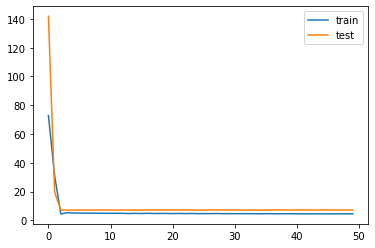

In [162]:
# plot history
plt.plot(training.history['loss'], label='train')
plt.plot(training.history['val_loss'], label='test')
plt.legend()
plt.show()

In [163]:
# Generalisation performance
earlystop_stats = simpleRNN.evaluate(X_test, y_test)

69/69 [==============================] - 0s 2ms/step - loss: 7.8189 - mean_absolute_error: 7.8189


# Single Layer LSTM

In [164]:
# Create a single LSTM layer model
def build_singleLSTM():
  inputs  = layers.Input(shape=(X_train.shape[1], 
                                X_train.shape[2]), name='input_layer')
  hidden  = layers.LSTM(128,
                        activation='relu', name='LSTM_layer1')(inputs)

  outputs = layers.Dense(units=1, name='output_layer')(hidden)
  model   = models.Model(inputs=inputs, outputs=outputs, 
                         name=("singleLSTM_model"))
  return model

In [165]:
# Create an RNN with a single LSTM layer 
sLSTM = build_singleLSTM()

# Model Summary
sLSTM.summary()

Model: "singleLSTM_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 1, 55)]           0         
                                                                 
 LSTM_layer1 (LSTM)          (None, 128)               94208     
                                                                 
 output_layer (Dense)        (None, 1)                 129       
                                                                 
Total params: 94,337
Trainable params: 94,337
Non-trainable params: 0
_________________________________________________________________


In [166]:
# Compiling model
sLSTM.compile(
    loss=losses.MeanAbsoluteError(),
    optimizer=optimizers.Adam(learning_rate=0.001), 
    metrics=['MeanAbsoluteError'])

In [167]:
# Fit the model 
training = sLSTM.fit(X_train, 
                     y_train, 
                     epochs=50, 
                     batch_size=64, 
                     validation_split=0.2, 
                     verbose=2, 
                     shuffle=False)

Epoch 1/50
83/83 - 2s - loss: 71.7225 - mean_absolute_error: 71.7225 - val_loss: 90.2570 - val_mean_absolute_error: 90.2570 - 2s/epoch - 22ms/step
Epoch 2/50
83/83 - 0s - loss: 9.1721 - mean_absolute_error: 9.1721 - val_loss: 7.3538 - val_mean_absolute_error: 7.3538 - 258ms/epoch - 3ms/step
Epoch 3/50
83/83 - 0s - loss: 4.8744 - mean_absolute_error: 4.8744 - val_loss: 7.3536 - val_mean_absolute_error: 7.3536 - 276ms/epoch - 3ms/step
Epoch 4/50
83/83 - 0s - loss: 4.6756 - mean_absolute_error: 4.6756 - val_loss: 7.2713 - val_mean_absolute_error: 7.2713 - 265ms/epoch - 3ms/step
Epoch 5/50
83/83 - 0s - loss: 4.6102 - mean_absolute_error: 4.6102 - val_loss: 7.3639 - val_mean_absolute_error: 7.3639 - 279ms/epoch - 3ms/step
Epoch 6/50
83/83 - 0s - loss: 4.4963 - mean_absolute_error: 4.4963 - val_loss: 7.1124 - val_mean_absolute_error: 7.1124 - 313ms/epoch - 4ms/step
Epoch 7/50
83/83 - 0s - loss: 4.6424 - mean_absolute_error: 4.6424 - val_loss: 7.2722 - val_mean_absolute_error: 7.2722 - 284ms/

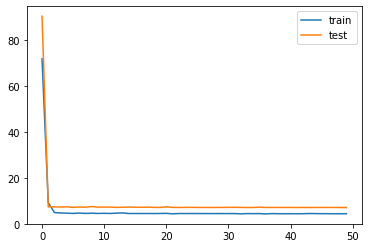

In [168]:
# plot history
plt.plot(training.history['loss'], label='train')
plt.plot(training.history['val_loss'], label='test')
plt.legend()
plt.show()

In [169]:
# Generalisation performance
earlystop_stats = sLSTM.evaluate(X_test, y_test)

69/69 [==============================] - 0s 2ms/step - loss: 7.7572 - mean_absolute_error: 7.7572


# LSTM with Dropout

In [170]:
# Create a single LSTM layer model
def build_dropoutLSTM():
  inputs  = layers.Input(shape=(X_train.shape[1], 
                                X_train.shape[2]), name='input_layer')
  hidden  = layers.LSTM(128,
                        activation='relu', 
                        name='LSTM_layer1')(inputs)
  hidden = layers.Dropout(rate=0.1, name='droupout_layer1')(hidden)

  outputs = layers.Dense(units=1, name='output_layer')(hidden)
  model   = models.Model(inputs=inputs, outputs=outputs, 
                         name=("singleLSTM_model"))
  return model

In [171]:
# Create an RNN with a single LSTM layer 
dropLSTM = build_dropoutLSTM()

# Model Summary
dropLSTM.summary()

Model: "singleLSTM_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 1, 55)]           0         
                                                                 
 LSTM_layer1 (LSTM)          (None, 128)               94208     
                                                                 
 droupout_layer1 (Dropout)   (None, 128)               0         
                                                                 
 output_layer (Dense)        (None, 1)                 129       
                                                                 
Total params: 94,337
Trainable params: 94,337
Non-trainable params: 0
_________________________________________________________________


In [172]:
# Compiling model
dropLSTM.compile(
    loss=losses.MeanAbsoluteError(),
    optimizer=optimizers.Adam(learning_rate=0.001), 
    metrics=['MeanAbsoluteError'])

In [173]:
# Fit the model 
training = dropLSTM.fit(X_train, 
                     y_train, 
                     epochs=50, 
                     batch_size=64, 
                     validation_split=0.2,
                     verbose=2, shuffle=False)

Epoch 1/50
83/83 - 2s - loss: 72.6980 - mean_absolute_error: 72.6980 - val_loss: 78.9638 - val_mean_absolute_error: 78.9638 - 2s/epoch - 21ms/step
Epoch 2/50
83/83 - 0s - loss: 7.8275 - mean_absolute_error: 7.8275 - val_loss: 7.9569 - val_mean_absolute_error: 7.9569 - 294ms/epoch - 4ms/step
Epoch 3/50
83/83 - 0s - loss: 6.8886 - mean_absolute_error: 6.8886 - val_loss: 8.1532 - val_mean_absolute_error: 8.1532 - 288ms/epoch - 3ms/step
Epoch 4/50
83/83 - 0s - loss: 6.9278 - mean_absolute_error: 6.9278 - val_loss: 7.1943 - val_mean_absolute_error: 7.1943 - 288ms/epoch - 3ms/step
Epoch 5/50
83/83 - 0s - loss: 6.1873 - mean_absolute_error: 6.1873 - val_loss: 7.2868 - val_mean_absolute_error: 7.2868 - 287ms/epoch - 3ms/step
Epoch 6/50
83/83 - 0s - loss: 6.1428 - mean_absolute_error: 6.1428 - val_loss: 7.1192 - val_mean_absolute_error: 7.1192 - 297ms/epoch - 4ms/step
Epoch 7/50
83/83 - 0s - loss: 6.5533 - mean_absolute_error: 6.5533 - val_loss: 9.2036 - val_mean_absolute_error: 9.2036 - 290ms/

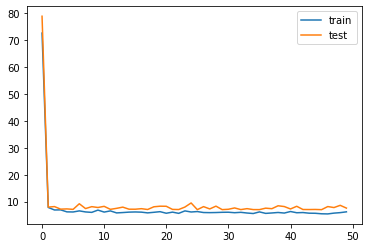

In [174]:
# plot history
plt.plot(training.history['loss'], label='train')
plt.plot(training.history['val_loss'], label='test')
plt.legend()
plt.show()

In [175]:
# Generalisation performance
earlystop_stats = dropLSTM.evaluate(X_test, y_test)

69/69 [==============================] - 0s 2ms/step - loss: 7.7530 - mean_absolute_error: 7.7530


# Stacked LSTM

In [176]:
# Create a single LSTM layer model
def build_stackedLSTM():
  inputs  = layers.Input(shape=(X_train.shape[1], 
                                X_train.shape[2]), name='input_layer')
  hidden  = layers.LSTM(128, return_sequences=True,
                        activation='relu', name='LSTM_layer1')(inputs)
  hidden = layers.LSTM(128, return_sequences=True,
                       activation='relu', name='LSTM_layer2')(hidden)

  outputs = layers.Dense(units=1, name='output_layer')(hidden)
  model   = models.Model(inputs=inputs, outputs=outputs, 
                         name=("singleLSTM_model"))
  return model

In [177]:
# Create an RNN with a single LSTM layer 
stackLSTM = build_stackedLSTM()

# Model Summary
stackLSTM.summary()

Model: "singleLSTM_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 1, 55)]           0         
                                                                 
 LSTM_layer1 (LSTM)          (None, 1, 128)            94208     
                                                                 
 LSTM_layer2 (LSTM)          (None, 1, 128)            131584    
                                                                 
 output_layer (Dense)        (None, 1, 1)              129       
                                                                 
Total params: 225,921
Trainable params: 225,921
Non-trainable params: 0
_________________________________________________________________


In [178]:
# Compiling model
stackLSTM.compile(
    loss=losses.MeanAbsoluteError(),
    optimizer=optimizers.Adam(learning_rate=0.001), 
    metrics=['MeanAbsoluteError'])

In [179]:
# Fit the model 
training = stackLSTM.fit(X_train, 
                     y_train, 
                     epochs=50, 
                     batch_size=64, 
                     validation_split=0.2,
                     verbose=2, shuffle=False)

Epoch 1/50
83/83 - 3s - loss: 45.6336 - mean_absolute_error: 45.6336 - val_loss: 12.4408 - val_mean_absolute_error: 12.4408 - 3s/epoch - 37ms/step
Epoch 2/50
83/83 - 0s - loss: 8.1797 - mean_absolute_error: 8.1797 - val_loss: 30.0817 - val_mean_absolute_error: 30.0817 - 427ms/epoch - 5ms/step
Epoch 3/50
83/83 - 0s - loss: 10.3063 - mean_absolute_error: 10.3063 - val_loss: 23.4119 - val_mean_absolute_error: 23.4119 - 458ms/epoch - 6ms/step
Epoch 4/50
83/83 - 0s - loss: 8.5397 - mean_absolute_error: 8.5397 - val_loss: 8.3597 - val_mean_absolute_error: 8.3597 - 413ms/epoch - 5ms/step
Epoch 5/50
83/83 - 0s - loss: 6.0324 - mean_absolute_error: 6.0324 - val_loss: 7.9700 - val_mean_absolute_error: 7.9700 - 456ms/epoch - 5ms/step
Epoch 6/50
83/83 - 0s - loss: 6.0352 - mean_absolute_error: 6.0352 - val_loss: 8.0284 - val_mean_absolute_error: 8.0284 - 448ms/epoch - 5ms/step
Epoch 7/50
83/83 - 0s - loss: 6.2403 - mean_absolute_error: 6.2403 - val_loss: 7.7545 - val_mean_absolute_error: 7.7545 - 

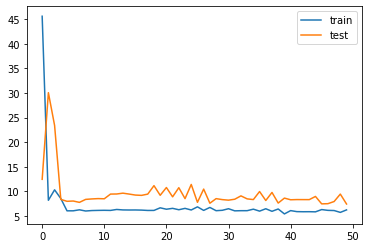

In [180]:
# plot history
plt.plot(training.history['loss'], label='train')
plt.plot(training.history['val_loss'], label='test')
plt.legend()
plt.show()

In [181]:
# Generalisation performance
earlystop_stats = stackLSTM.evaluate(X_test, y_test)

69/69 [==============================] - 0s 2ms/step - loss: 7.7988 - mean_absolute_error: 7.7988


# Stacked LSTM with Dropout

In [182]:
# Create a single LSTM layer model
def build_sdLSTM():
  inputs  = layers.Input(shape=(X_train.shape[1], 
                                X_train.shape[2]), name='input_layer')
  hidden  = layers.LSTM(128, return_sequences=True,
                        activation='relu', name='LSTM_layer1')(inputs)
  
  hidden = layers.Dropout(rate=0.1, name='droupout_layer1')(hidden)

  hidden = layers.LSTM(128, return_sequences=True,
                       activation='relu', name='LSTM_layer2')(hidden)
  hidden = layers.Dropout(rate=0.1, name='droupout_layer2')(hidden)

  outputs = layers.Dense(units=1, name='output_layer')(hidden)
  model   = models.Model(inputs=inputs, outputs=outputs, 
                         name=("singleLSTM_model"))
  return model

In [183]:
# Create an RNN with a single LSTM layer 
stackLSTM = build_stackedLSTM()

# Model Summary
stackLSTM.summary()

Model: "singleLSTM_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 1, 55)]           0         
                                                                 
 LSTM_layer1 (LSTM)          (None, 1, 128)            94208     
                                                                 
 LSTM_layer2 (LSTM)          (None, 1, 128)            131584    
                                                                 
 output_layer (Dense)        (None, 1, 1)              129       
                                                                 
Total params: 225,921
Trainable params: 225,921
Non-trainable params: 0
_________________________________________________________________


In [184]:
# Compiling model
stackLSTM.compile(
    loss=losses.MeanAbsoluteError(),
    optimizer=optimizers.Adam(learning_rate=0.001), 
    metrics=['MeanAbsoluteError'])

In [185]:
# Fit the model 
training = stackLSTM.fit(X_train, 
                     y_train, 
                     epochs=50, 
                     batch_size=64, 
                     validation_split=0.2,
                     verbose=2, shuffle=False)

Epoch 1/50
83/83 - 3s - loss: 50.6317 - mean_absolute_error: 50.6317 - val_loss: 43.4749 - val_mean_absolute_error: 43.4749 - 3s/epoch - 38ms/step
Epoch 2/50
83/83 - 0s - loss: 11.4246 - mean_absolute_error: 11.4246 - val_loss: 25.3379 - val_mean_absolute_error: 25.3379 - 443ms/epoch - 5ms/step
Epoch 3/50
83/83 - 0s - loss: 9.4907 - mean_absolute_error: 9.4907 - val_loss: 26.0456 - val_mean_absolute_error: 26.0456 - 437ms/epoch - 5ms/step
Epoch 4/50
83/83 - 0s - loss: 9.6442 - mean_absolute_error: 9.6442 - val_loss: 25.0332 - val_mean_absolute_error: 25.0332 - 440ms/epoch - 5ms/step
Epoch 5/50
83/83 - 0s - loss: 8.8586 - mean_absolute_error: 8.8586 - val_loss: 8.4639 - val_mean_absolute_error: 8.4639 - 454ms/epoch - 5ms/step
Epoch 6/50
83/83 - 0s - loss: 6.0810 - mean_absolute_error: 6.0810 - val_loss: 7.8356 - val_mean_absolute_error: 7.8356 - 422ms/epoch - 5ms/step
Epoch 7/50
83/83 - 0s - loss: 6.0490 - mean_absolute_error: 6.0490 - val_loss: 7.8460 - val_mean_absolute_error: 7.8460 

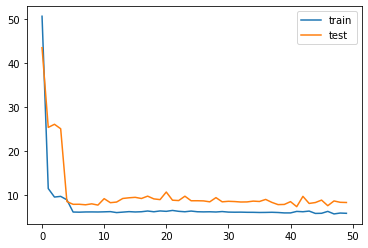

In [186]:
# plot history
plt.plot(training.history['loss'], label='train')
plt.plot(training.history['val_loss'], label='test')
plt.legend()
plt.show()

In [187]:
# Generalisation performance
earlystop_stats = stackLSTM.evaluate(X_test, y_test)

69/69 [==============================] - 0s 3ms/step - loss: 8.0267 - mean_absolute_error: 8.0267
